In [1]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
import tqdm
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
import pandas as pd
%pylab inline

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
filenames = ['/content/drive/My Drive/Проект/Images/36.jpg',
            '/content/drive/My Drive/Проект/Images/36 copy.jpg',
            '/content/drive/My Drive/Проект/Images/36 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/36 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/38.jpg',
            '/content/drive/My Drive/Проект/Images/38 copy.jpg',
            '/content/drive/My Drive/Проект/Images/38 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/38 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/39.jpg',
            '/content/drive/My Drive/Проект/Images/39 copy.jpg',
            '/content/drive/My Drive/Проект/Images/39 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/39 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/40.jpg',
            '/content/drive/My Drive/Проект/Images/40 copy.jpg',
            '/content/drive/My Drive/Проект/Images/40 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/40 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/41.jpg',
            '/content/drive/My Drive/Проект/Images/41 copy.jpg',
            '/content/drive/My Drive/Проект/Images/41 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/41 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/42.jpg',
            '/content/drive/My Drive/Проект/Images/42 copy.jpg',
            '/content/drive/My Drive/Проект/Images/42 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/42 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/43.jpg',
            '/content/drive/My Drive/Проект/Images/43 copy.jpg',
            '/content/drive/My Drive/Проект/Images/43 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/43 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/45.jpg',
            '/content/drive/My Drive/Проект/Images/45 copy.jpg',
            '/content/drive/My Drive/Проект/Images/45 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/45 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/46.jpg',
            '/content/drive/My Drive/Проект/Images/46 copy.jpg',
            '/content/drive/My Drive/Проект/Images/46 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/46 copy 3.jpg',
            '/content/drive/My Drive/Проект/Images/47.jpg',
            '/content/drive/My Drive/Проект/Images/47 copy.jpg',
            '/content/drive/My Drive/Проект/Images/47 copy 2.jpg',
            '/content/drive/My Drive/Проект/Images/47 copy 3.jpg']

In [0]:
k = 0
for i in filenames:
  image = Image.open(i)
  h = pd.DataFrame(list(image.getdata()))
  n = np.array(h[0])
  '''
  plt.figure
  n = n.reshape(412,540)
  plt.imshow(n, cmap=plt.cm.gray)
  #plt.subplot(1, 10, k + 1)
  plt.title('Номер: %s\n' % k, fontsize = 20)
  plt.show()
  k += 1
  '''

In [0]:
a = [37, 37, 37, 37, 35, 35, 35, 35, 36, 36, 36, 36, 47, 47, 47, 47,
     31, 31, 31, 31, 30, 30, 30, 30, 37, 37, 37, 37, 28, 28, 28, 28, 44, 44, 44, 44, 44, 44, 44, 44]

In [0]:
mas = []
for i in filenames:
  image = Image.open(i)
  h = pd.DataFrame(list(image.getdata()))
  n = np.array(h[0])
  mas.append(n)

data = np.array(mas)
d = {'data' : data}
#table = pd.DataFrame(d)
#table.insert(1,'answers',a)
#table['data']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data, 
    a, 
    test_size=0.2)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)


In [0]:
X_train = X_train.reshape([-1, 412 * 540])
X_test = X_test.reshape([-1, 412 * 540])

In [30]:
torch.cuda.is_available()

True

In [31]:
!nvidia-smi

Wed Apr 22 14:57:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    75W / 149W |   1154MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
class CellSuperCounter(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(CellSuperCounter, self).__init__()
        self.fc1 = torch.nn.Linear(540 * 412, n_hidden_neurons)
        self.ac1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 60) 
        #self.ac2 = torch.nn.Tanh()
        #self.fc3 = torch.nn.Linear(n_hidden_neurons, 60)
        #self.ac3 = torch.nn.Tanh()
        #self.fc4 = torch.nn.Linear(n_hidden_neurons, 60)
        #self.dropout = torch.nn.Dropout(p=0.2)
    
    def forward(self, x):
        x = self.fc1(x)
        #x = self.dropout(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x# = self.ac2(x)
        #x = self.fc3(x)
        #x = self.ac3(x)
        #x = self.fc4(x)

        return x
    
cells = CellSuperCounter(100)

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cells = cells.to(device)
#list(cells.parameters())

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cells.parameters(), lr=1.0e-3)

In [35]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
Y_test = Y_test.to(device)

for epoch in tqdm.notebook.tqdm(range(800)):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = Y_train[batch_indexes].to(device)
        
        preds = cells.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = cells.forward(X_test)
    test_loss_history.append(loss(test_preds, Y_test))
    
    accuracy = (test_preds.argmax(dim=1) == Y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.5000, device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(0.7500, device='cuda:0')
tensor(0

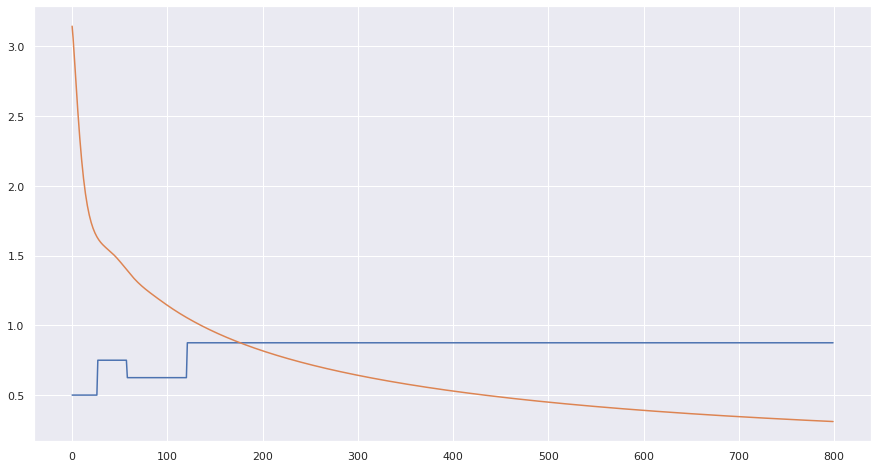

In [36]:
plt.figure(figsize=(15,8))
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);